In [1]:
%matplotlib inline

# Comparisons between different versions of skprocrustes solvers

In [2]:
import skprocrustes as skp
import time
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## 1. Comparison between old versions of all solvers

In [3]:
gkbsolver = skp.GKBSolver(verbose=0)
spgsolver = skp.SPGSolver(verbose=0)
gpisolver = skp.GPISolver(verbose=0)
ebsolver = skp.EBSolver(verbose=0)

## Problem 1

In [4]:
problem1 = skp.ProcrustesProblem((5000,5000,10,10), problemnumber=1)

### Problem 1: GKB

In [5]:
t0 = time.time(); results1_gkb = gkbsolver.solve(problem1); t1_gkb = time.time()-t0; print(t1_gkb)

1.4713881015777588


In [6]:
results1_gkb.show()

 Summary:
success : True
status : 0
message : Optimization terminated successfully.
fun : 9.369117093649114e-07
normgrad : 1.2722151536843884e-05
nbiter : 0.094
nfev : 0.11200000000000004
blocksteps : 3


### Problem 1: SPG

In [7]:
t0 = time.time(); results1_spg = spgsolver.solve(problem1); t1_spg = time.time()-t0; print(t1_spg)

2.942115068435669


In [8]:
results1_spg.show()

 Summary:
success : True
status : 0
message : Optimization terminated successfully.
fun : 1.884359542465025e-11
normgrad : 0.0001971674228337678
nbiter : 6
nfev : 7.0


### Problem 1: GPI

In [9]:
t0 = time.time(); results1_gpi = gpisolver.solve(problem1); t1_gpi = time.time()-t0; print(t1_gpi)

25.904895067214966


In [10]:
results1_gpi.show()

 Summary:
success : True
status : 0
message : Optimization terminated successfully.
fun : 1.902734885954275e-07
nbiter : 5
nfev : 6


### Problem 1: EB

In [11]:
t0 = time.time(); results1_eb = ebsolver.solve(problem1); t1_eb = time.time()-t0; print(t1_eb)

688.1072330474854


In [12]:
results1_eb.show()

 Summary:
success : True
status : 0
message : Optimization terminated successfully.
fun : 5.164083590560066e-07
nbiter : 8
nfev : 9


### Problem 1: All

Text(0.5,1,'Problem 1')

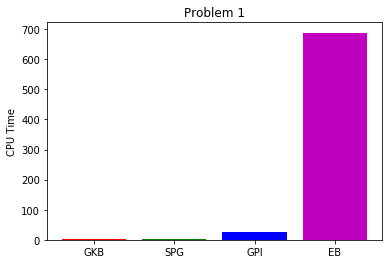

In [13]:
gkb, spg, gpi, eb = plt.bar([0,1,2,3], [t1_gkb, t1_spg, t1_gpi, t1_eb])
gkb.set_facecolor('r')
spg.set_facecolor('g')
gpi.set_facecolor('b')
eb.set_facecolor('m')
ax = plt.gca()
ax.set_xticks([0,1,2,3])
ax.set_xticklabels(['GKB', 'SPG', 'GPI', 'EB'])
#ax.set_ylim([0, 100])
ax.set_ylabel('CPU Time')
ax.set_title('Problem 1')

In [14]:
results = pd.DataFrame({ 'GKB' : [t1_gkb], 'SPG' : [t1_spg], 'GPI' : [t1_gpi], 'EB' : [t1_eb]}, index=['problem1'])
results = results.T
results

,problem1
GKB,1.471388
SPG,2.942115
GPI,25.904895
EB,688.107233


## Problem 2

In [15]:
problem2 = skp.ProcrustesProblem((500,500,5,5), problemnumber=2)

### Problem 2: GKB

In [16]:
t0 = time.time(); results2_gkb = gkbsolver.solve(problem2); t2_gkb = time.time()-t0; print(t2_gkb)

134.401038646698


In [17]:
results2_gkb.show()

 Summary:
success : True
status : 0
message : Optimization terminated successfully.
fun : 2.106283571729108e-07
normgrad : 0.00040962488584510043
nbiter : 31345.65
nfev : 53634.83999999842
blocksteps : 96


### Problem 2: SPG

In [18]:
t0 = time.time(); results2_spg = spgsolver.solve(problem2); t2_spg = time.time()-t0; print(t2_spg)

0.8769497871398926


In [19]:
results2_spg.show()

 Summary:
success : True
status : 0
message : Optimization terminated successfully.
fun : 1.6685364759521507e-08
normgrad : 0.0009943062777651034
nbiter : 619
nfev : 1033.0


### Problem 2: GPI

In [20]:
t0 = time.time(); results2_gpi = gpisolver.solve(problem2); t2_gpi = time.time()-t0; print(t2_gpi)

3.3658313751220703


In [21]:
results2_gpi.show()

 Summary:
success : True
status : 0
message : Optimization terminated successfully.
fun : 0.0009037278970821399
nbiter : 1525
nfev : 1526


### Problem 2: EB

In [22]:
t0 = time.time(); results2_eb = ebsolver.solve(problem2); t2_eb = time.time()-t0; print(t2_eb)

213.9796814918518


In [23]:
results2_eb.show()

 Summary:
success : True
status : 0
message : Optimization terminated successfully.
fun : 9.992238591953361e-07
nbiter : 3098
nfev : 3099


### Problem 2: All

Text(0.5,1,'Problem 2')

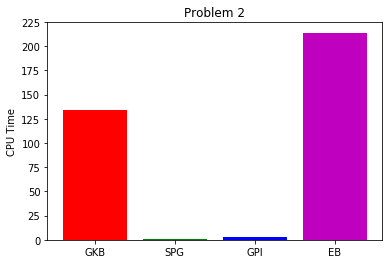

In [24]:
gkb, spg, gpi, eb = plt.bar([0,1,2,3], [t2_gkb, t2_spg, t2_gpi, t2_eb])
gkb.set_facecolor('r')
spg.set_facecolor('g')
gpi.set_facecolor('b')
eb.set_facecolor('m')
ax = plt.gca()
ax.set_xticks([0,1,2,3])
ax.set_xticklabels(['GKB', 'SPG', 'GPI', 'EB'])
#ax.set_ylim([0, 100])
ax.set_ylabel('CPU Time')
ax.set_title('Problem 2')

In [25]:
results['problem2'] = pd.Series([t2_gkb, t2_spg, t2_gpi, t2_eb], index=results.index)
results

,problem1,problem2
GKB,1.471388,134.401039
SPG,2.942115,0.876950
GPI,25.904895,3.365831
EB,688.107233,213.979681


## Problem 3

In [26]:
problem3 = skp.ProcrustesProblem((1000, 1000, 5, 5), problemnumber=3)

### Problem 3: GKB

In [27]:
t0 = time.time(); results3_gkb = gkbsolver.solve(problem3); t3_gkb = time.time()-t0; print(t3_gkb)

16.48031449317932


In [28]:
results3_gkb.show()

 Summary:
success : True
status : 0
message : Optimization terminated successfully.
fun : 1.8625327818062572e-06
normgrad : 5.844948773162279e-05
nbiter : 2744.1550000000007
nfev : 4660.020000000038
blocksteps : 42


### Problem 3: SPG

In [29]:
t0 = time.time(); results3_spg = spgsolver.solve(problem3); t3_spg = time.time()-t0; print(t3_spg)

0.5183501243591309


In [30]:
results3_spg.show()

 Summary:
success : True
status : 0
message : Optimization terminated successfully.
fun : 0.001402353910427962
normgrad : 0.0009928347533418084
nbiter : 87
nfev : 127.0


### Problem 3: GPI

In [31]:
t0 = time.time(); results3_gpi = gpisolver.solve(problem3); t3_gpi = time.time()-t0; print(t3_gpi)

4.191292762756348


In [32]:
results3_gpi.show()

 Summary:
success : True
status : 0
message : Optimization terminated successfully.
fun : 0.001415648322331691
nbiter : 435
nfev : 436


### Problem 3: EB

In [33]:
t0 = time.time(); results3_eb = ebsolver.solve(problem3); t3_eb = time.time()-t0; print(t3_eb)

107.37181639671326


In [34]:
results3_eb.show()

 Summary:
success : True
status : 0
message : Optimization terminated successfully.
fun : 0.0014023538388620214
nbiter : 168
nfev : 169


### Problem 3: All

Text(0.5,1,'Problem 3')

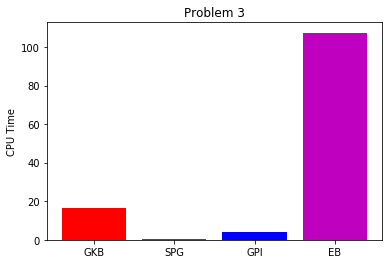

In [35]:
gkb, spg, gpi, eb = plt.bar([0,1,2,3], [t3_gkb, t3_spg, t3_gpi, t3_eb])
gkb.set_facecolor('r')
spg.set_facecolor('g')
gpi.set_facecolor('b')
eb.set_facecolor('m')
ax = plt.gca()
ax.set_xticks([0,1,2,3])
ax.set_xticklabels(['GKB', 'SPG', 'GPI', 'EB'])
#ax.set_ylim([0, 100])
ax.set_ylabel('CPU Time')
ax.set_title('Problem 3')

In [36]:
results['problem3'] = pd.Series([t3_gkb, t3_spg, t3_gpi, t3_eb], index=results.index)
results

,problem1,problem2,problem3
GKB,1.471388,134.401039,16.480314
SPG,2.942115,0.876950,0.518350
GPI,25.904895,3.365831,4.191293
EB,688.107233,213.979681,107.371816


## 2. Comparison between blobop and old residual for GKBSolver.

In [37]:
gkbsolver_blobop = skp.GKBSolver(verbose=0, bloboptest = True)

### Problem 1

In [38]:
t0 = time.time(); results1_gkbblobop = gkbsolver_blobop.solve(problem1); t1_blobop = time.time()-t0

1.7203334103252108
1.0
1.3322676295501878e-15
7.74424086374244e-16
1.758444490031985
1.0
1.4914363659789989
5.585734034381035
0.1537627197686221
1.357783309091442
6.719450008808858e-05
0.0005930011385221925
1.7631468088764444
1.0
1.4914093579639718
5.4884203592693535
0.244550970328774
8.995315505288659
0.01620703429405062
1.4761249216484937
0.00038529458588081045
0.03636861134844803


In [39]:
results1_gkbblobop.show()

 Summary:
success : True
status : 0
message : Optimization terminated successfully.
fun : 9.358376313116639e-07
normgrad : 3.1601087154878066e-05
nbiter : 0.07200000000000001
nfev : 0.09000000000000002
blocksteps : 3


In [40]:
results1_gkb.show()

 Summary:
success : True
status : 0
message : Optimization terminated successfully.
fun : 9.369117093649114e-07
normgrad : 1.2722151536843884e-05
nbiter : 0.094
nfev : 0.11200000000000004
blocksteps : 3


Text(0.5,1,'Problem 1')

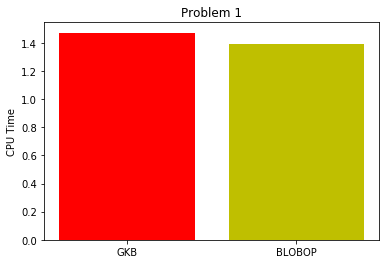

In [41]:
gkb, blobop = plt.bar([0,1], [t1_gkb, t1_blobop])
gkb.set_facecolor('r')
blobop.set_facecolor('y')
ax = plt.gca()
ax.set_xticks([0,1])
ax.set_xticklabels(['GKB', 'BLOBOP'])
#ax.set_ylim([0, 100])
ax.set_ylabel('CPU Time')
ax.set_title('Problem 1')

Text(0.5,1,'Problem 1')

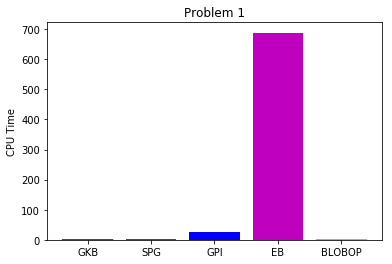

In [42]:
gkb, spg, gpi, eb, blobop = plt.bar([0,1,2,3,4], [t1_gkb, t1_spg, t1_gpi, t1_eb, t1_blobop])
gkb.set_facecolor('r')
spg.set_facecolor('g')
gpi.set_facecolor('b')
eb.set_facecolor('m')
blobop.set_facecolor('y')
ax = plt.gca()
ax.set_xticks([0,1,2,3,4])
ax.set_xticklabels(['GKB', 'SPG', 'GPI', 'EB', 'BLOBOP'])
#ax.set_ylim([0, 100])
ax.set_ylabel('CPU Time')
ax.set_title('Problem 1')

### Problem 2

In [43]:
t0 = time.time(); results2_gkbblobop = gkbsolver_blobop.solve(problem2); t2_blobop = time.time()-t0

In [44]:
results2_gkbblobop.show()

 Summary:
success : True
status : 0
message : Optimization terminated successfully.
fun : 9.714534504352091e-10
normgrad : 0.0005747080235456682
nbiter : 1335.9699999999998
nfev : 2667.750000000026
blocksteps : 100


In [45]:
results2_gkb.show()

 Summary:
success : True
status : 0
message : Optimization terminated successfully.
fun : 2.106283571729108e-07
normgrad : 0.00040962488584510043
nbiter : 31345.65
nfev : 53634.83999999842
blocksteps : 96


Text(0.5,1,'Problem 2')

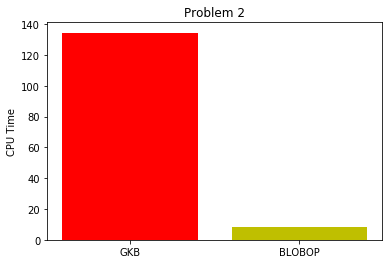

In [46]:
gkb, blobop = plt.bar([0,1], [t2_gkb, t2_blobop])
gkb.set_facecolor('r')
blobop.set_facecolor('y')
ax = plt.gca()
ax.set_xticks([0,1])
ax.set_xticklabels(['GKB', 'BLOBOP'])
#ax.set_ylim([0, 100])
ax.set_ylabel('CPU Time')
ax.set_title('Problem 2')

Text(0.5,1,'Problem 2')

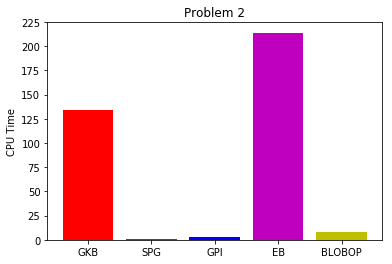

In [47]:
gkb, spg, gpi, eb, blobop = plt.bar([0,1,2,3,4], [t2_gkb, t2_spg, t2_gpi, t2_eb, t2_blobop])
gkb.set_facecolor('r')
spg.set_facecolor('g')
gpi.set_facecolor('b')
eb.set_facecolor('m')
blobop.set_facecolor('y')
ax = plt.gca()
ax.set_xticks([0,1,2,3,4])
ax.set_xticklabels(['GKB', 'SPG', 'GPI', 'EB', 'BLOBOP'])
#ax.set_ylim([0, 100])
ax.set_ylabel('CPU Time')
ax.set_title('Problem 2')

### Problem 3

In [48]:
t0 = time.time(); results3_gkbblobop = gkbsolver_blobop.solve(problem3); t3_blobop = time.time()-t0

In [49]:
results3_gkbblobop.show()

 Summary:
success : True
status : 0
message : Optimization terminated successfully.
fun : 0.0014034077612210157
normgrad : 0.0007204203435865303
nbiter : 600.185
nfev : 717.8400000000001
blocksteps : 200


In [50]:
results3_gkb.show()

 Summary:
success : True
status : 0
message : Optimization terminated successfully.
fun : 1.8625327818062572e-06
normgrad : 5.844948773162279e-05
nbiter : 2744.1550000000007
nfev : 4660.020000000038
blocksteps : 42


Text(0.5,1,'Problem 3')

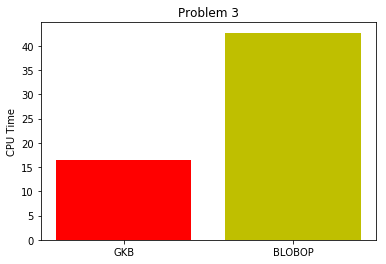

In [51]:
gkb, blobop = plt.bar([0,1], [t3_gkb, t3_blobop])
gkb.set_facecolor('r')
blobop.set_facecolor('y')
ax = plt.gca()
ax.set_xticks([0,1])
ax.set_xticklabels(['GKB', 'BLOBOP'])
#ax.set_ylim([0, 100])
ax.set_ylabel('CPU Time')
ax.set_title('Problem 3')

Text(0.5,1,'Problem 3')

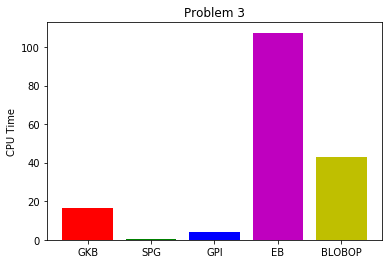

In [52]:
gkb, spg, gpi, eb, blobop = plt.bar([0,1,2,3,4], [t3_gkb, t3_spg, t3_gpi, t3_eb, t3_blobop])
gkb.set_facecolor('r')
spg.set_facecolor('g')
gpi.set_facecolor('b')
eb.set_facecolor('m')
blobop.set_facecolor('y')
ax = plt.gca()
ax.set_xticks([0,1,2,3,4])
ax.set_xticklabels(['GKB', 'SPG', 'GPI', 'EB', 'BLOBOP'])
#ax.set_ylim([0, 100])
ax.set_ylabel('CPU Time')
ax.set_title('Problem 3')

In [53]:
r = pd.DataFrame({'problem1' : t1_blobop, 'problem2' : t2_blobop, 'problem3' : t3_blobop}, index=['BLOBOP'])
results = results.append(r)
results

,problem1,problem2,problem3
GKB,1.471388,134.401039,16.480314
SPG,2.942115,0.876950,0.518350
GPI,25.904895,3.365831,4.191293
EB,688.107233,213.979681,107.371816
BLOBOP,1.390089,8.566195,42.723635


## 3. Comparison between svd and polar decomposition on GKBSolver

In [54]:
gkbpolar = skp.GKBSolver(verbose=0, polar="ns")
gkbpolarblobop = skp.GKBSolver(verbose=0, polar="ns", bloboptest=True)

### Problem 1

In [55]:
t0 = time.time(); results1_gkbpolar = gkbpolar.solve(problem1); t1_gkbpolar = time.time()-t0

In [56]:
results1_gkbpolar.show()

 Summary:
success : True
status : 0
message : Optimization terminated successfully.
fun : 9.364957452178045e-07
normgrad : 1.2715412779723001e-05
nbiter : 0.094
nfev : 0.11200000000000004
blocksteps : 3


In [57]:
t0 = time.time(); results1_gkbpolarblobop = gkbpolarblobop.solve(problem1); t1_gkbpolarblobop = time.time()-t0

In [58]:
results1_gkbpolarblobop.show()

 Summary:
success : True
status : 0
message : Optimization terminated successfully.
fun : 9.364152738911131e-07
normgrad : 3.159041263489263e-05
nbiter : 0.07200000000000001
nfev : 0.09000000000000002
blocksteps : 3


Text(0.5,1,'Problem 1')

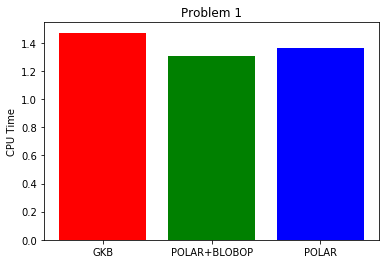

In [59]:
gkb, polarblobop, polar = plt.bar([0,1,2], [t1_gkb, t1_gkbpolarblobop, t1_gkbpolar])
gkb.set_facecolor('r')
polarblobop.set_facecolor('g')
polar.set_facecolor('b')
ax = plt.gca()
ax.set_xticks([0,1,2])
ax.set_xticklabels(['GKB', 'POLAR+BLOBOP', 'POLAR'])
#ax.set_ylim([0, 100])
ax.set_ylabel('CPU Time')
ax.set_title('Problem 1')

### Problem 2

In [60]:
t0 = time.time(); results2_gkbpolar = gkbpolar.solve(problem2); t2_gkbpolar = time.time()-t0

Exception: Warning: constraint violation = 0.2701938715874206

In [61]:
results2_gkbpolar.show()

NameError: name 'results2_gkbpolar' is not defined

In [ ]:
t0 = time.time(); results2_gkbpolarblobop = gkbpolarblobop.solve(problem2); t2_gkbpolarblobop = time.time()-t0

In [ ]:
results2_gkbpolarblobop.show()

In [ ]:
gkb, polarblobop, polar = plt.bar([0,1,2], [t2_gkb, t2_gkbpolarblobop, t2_gkbpolar])
gkb.set_facecolor('r')
polarblobop.set_facecolor('g')
polar.set_facecolor('b')
ax = plt.gca()
ax.set_xticks([0,1,2])
ax.set_xticklabels(['GKB', 'POLAR+BLOBOP', 'POLAR'])
#ax.set_ylim([0, 100])
ax.set_ylabel('CPU Time')
ax.set_title('Problem 2')

### Problem 3

In [ ]:
t0 = time.time(); results3_gkbpolar = gkbpolar.solve(problem3); t3_gkbpolar = time.time()-t0

In [ ]:
results3_gkbpolar.show()

In [ ]:
t0 = time.time(); results3_gkbpolarblobop = gkbpolarblobop.solve(problem3); t3_gkbpolarblobop = time.time()-t0

In [ ]:
results3_gkbpolarblobop.show()

In [ ]:
gkb, polarblobop, polar = plt.bar([0,1,2], [t3_gkb, t3_gkbpolarblobop, t3_gkbpolar])
gkb.set_facecolor('r')
polarblobop.set_facecolor('g')
polar.set_facecolor('b')
ax = plt.gca()
ax.set_xticks([0,1,2])
ax.set_xticklabels(['GKB', 'POLAR+BLOBOP', 'POLAR'])
#ax.set_ylim([0, 100])
ax.set_ylabel('CPU Time')
ax.set_title('Problem 3')

## 4. Comparison between all versions

### Problem 1

In [ ]:
gkb, blobop, polarblobop, polar, spg, gpi, eb = plt.bar([0, 1, 2, 3, 4, 5, 6], [t1_gkb, t1_blobop, t1_gkbpolarblobop, t1_gkbpolar, t1_spg, t1_gpi, t1_eb])
gkb.set_facecolor('r')
blobop.set_facecolor('k')
polarblobop.set_facecolor('g')
polar.set_facecolor('b')
spg.set_facecolor('y')
gpi.set_facecolor('m')
eb.set_facecolor('c')
ax = plt.gca()
ax.set_xticks([0,1,2,3,4,5,6])
ax.set_xticklabels(['GKB', 'BLOBOP', 'POLAR+BLOBOP', 'POLAR', 'SPG', 'GPI', 'EB'])
#ax.set_ylim([0, 100])
ax.set_ylabel('CPU Time')
ax.set_title('Problem 1')

### Problem 2

### Problem 3